## Statements:
>the more subscribers the higher the rating

>rating rating might always be higher in some of the categories




# Import Essential Libraries

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Preparation

In [4]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('Course_info.csv')
#select equired columns
SubCatPaid_raw = pd.DataFrame(rawcoursedata[['avg_rating','num_subscribers','subcategory','price','category']][rawcoursedata['price'] != 0])
# Convert all Variable Names to UPPERCASE
SubCatPaid_raw.columns = SubCatPaid_raw.columns.str.upper()
# To add suicide_rate column for prediction ('High' and 'Low')
SubCatPaid_raw['AVG_RATING'] = np.where(SubCatPaid_raw['AVG_RATING']>4, 'High', 'Low')
SubCatPaid_raw

,AVG_RATING,NUM_SUBSCRIBERS,SUBCATEGORY,PRICE,CATEGORY
0,Low,2231.0,Food & Beverage,24.99,Lifestyle
2,High,1713.0,Other Lifestyle,19.99,Lifestyle
3,High,4988.0,Pet Care & Training,199.99,Lifestyle
4,High,1266.0,Web Design,159.99,Design
5,High,20505.0,Yoga,29.99,Health & Fitness
...,...,...,...,...,...
209729,Low,3.0,Language Learning,19.99,Teaching & Academics
209730,Low,0.0,IT Certifications,49.99,IT & Software
209731,Low,0.0,IT Certifications,49.99,IT & Software
209732,Low,0.0,Other Finance & Accounting,119.99,Finance & Accounting


### remove outliers

<class 'str'>, NUM_SUBSCRIBERS => 20.0, 1065.0
[NUM_SUBSCRIBERS] total outliers: 28237
<class 'str'>, PRICE => 19.99, 109.99
[PRICE] total outliers: 10888


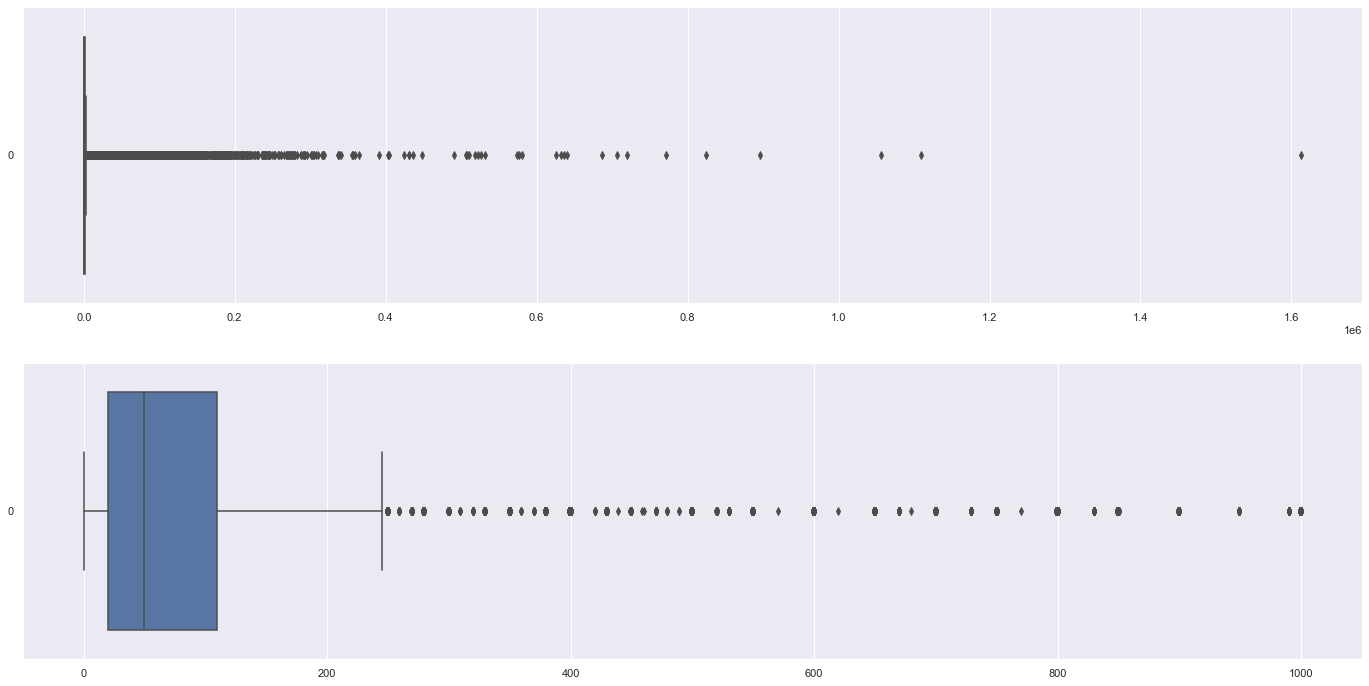

In [5]:
    f, axes = plt.subplots(2, 1, figsize=(24, 12))
    # Draw the Boxplots 
    sb.boxplot(data = SubCatPaid_raw.NUM_SUBSCRIBERS, orient = "h", ax = axes[0])
    sb.boxplot(data = SubCatPaid_raw.PRICE, orient = "h", ax = axes[1])

    column= 'NUM_SUBSCRIBERS'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    
    column= 'PRICE'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    

In [6]:
q1 = SubCatPaid_raw.quantile(0.25)
q3 = SubCatPaid_raw.quantile(0.75)
interquartile_range = q3-q1

lower_whisker = q1-1.5*interquartile_range
upper_whisker = q3+1.5*interquartile_range

outliers = ((SubCatPaid_raw < lower_whisker) | (SubCatPaid_raw > upper_whisker)).any(axis=1)
SubCatPaid_cleanup: pd.DataFrame = SubCatPaid_raw[~outliers]
print(f"Union outliers: {sum(outliers)}")
SubCatPaid_cleanup.head

Union outliers: 38024


<bound method NDFrame.head of        AVG_RATING  NUM_SUBSCRIBERS                 SUBCATEGORY   PRICE  \
0             Low           2231.0             Food & Beverage   24.99   
2            High           1713.0             Other Lifestyle   19.99   
4            High           1266.0                  Web Design  159.99   
9            High            483.0  Search Engine Optimization   99.99   
10           High            794.0            Teacher Training   49.99   
...           ...              ...                         ...     ...   
209729        Low              3.0           Language Learning   19.99   
209730        Low              0.0           IT Certifications   49.99   
209731        Low              0.0           IT Certifications   49.99   
209732        Low              0.0  Other Finance & Accounting  119.99   
209733        Low              0.0           IT Certifications   49.99   

                    CATEGORY  
0                  Lifestyle  
2                  

In [7]:
SubCatPaid_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149972 entries, 0 to 209733
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AVG_RATING       149972 non-null  object 
 1   NUM_SUBSCRIBERS  149972 non-null  float64
 2   SUBCATEGORY      149972 non-null  object 
 3   PRICE            149972 non-null  float64
 4   CATEGORY         149972 non-null  object 
dtypes: float64(2), object(3)
memory usage: 6.9+ MB


# Classification tree

In [8]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree



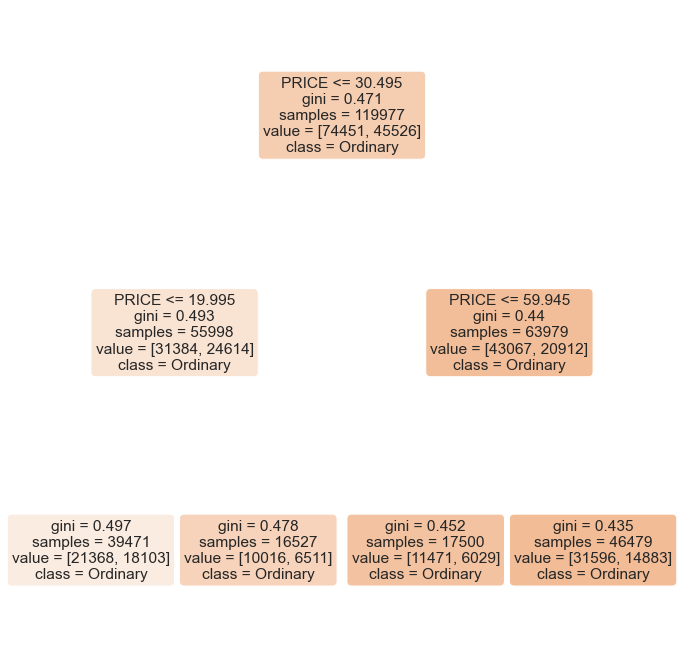

In [10]:
# Recall the Legendary-Total Dataset
CentralAir = pd.DataFrame(SubCatPaid_cleanup['AVG_RATING'])     # Predictor
SalePrice = pd.DataFrame(SubCatPaid_cleanup['PRICE'])       # Response
        

# Split the air-price Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SalePrice, CentralAir, test_size = 0.2)

# Decision Tree using Train Data
tree_CA_SP_d2 = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
tree_CA_SP_d2.fit(X_train, y_train)                    # train the decision tree model

# Predict air values corresponding to price
y_train_pred = tree_CA_SP_d2.predict(X_train)
y_test_pred = tree_CA_SP_d2.predict(X_test)

# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree_CA_SP_d2, filled=True, rounded=True, 
          feature_names=["PRICE"], 
          class_names=["Ordinary","AVG_RATING"])
plt.show()

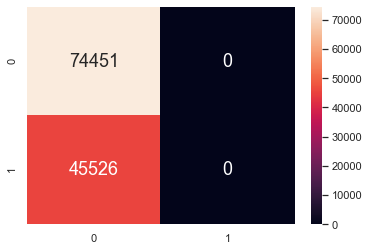

In [11]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = tree_CA_SP_d2.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [12]:
# Check the Goodness of Fit (on Train Data)
print("Train Data")
print("Accuracy  :\t", tree_CA_SP_d2.score(X_train, y_train))
print()
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 


print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.6205439375880377

TPR Train :	 0.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 1.0
